**1,Khai báo các thư viện cần sử dụng**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**2,Kết nối với Google Drive để đọc và lưu dữ liệu**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3,Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [3]:
import os
train_image_files_path = "/content/drive/MyDrive/HHT/Data/Train"
valid_image_files_path = "/content/drive/MyDrive/HHT/Data/Validation"

**4,Gán nhãn dữ liệu**

In [4]:
label = ['cats','dogs','panda']

**5,Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

**6,Đọc dữ liệu train và validation**

In [6]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='categorical'
)
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='categorical'
)

Found 300 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


**7,Xây dựng mô hình**

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

model = tf.keras.models.Sequential()

# Lớp CNN1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# Lớp CNN2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Lớp CNN3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

# Chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())
# Lớp ẩn
model.add(Dense(128,activation=tf.nn.relu))
# Lớp output
model.add(Dense(3,activation=tf.nn.softmax))

**8,Thiết lập các tham số để huấn luyện mô hình**

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

**9,Huấn luyện mô hình**

In [9]:
import tensorflow as tf
EPOCHS = 15
history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=EPOCHS,
        verbose=1,
        validation_data = validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/15
10/10 [==============================] - 67s 6s/step - loss: 1.3910 - acc: 0.3533 - val_loss: 1.1185 - val_acc: 0.3103
Epoch 2/15
10/10 [==============================] - 16s 2s/step - loss: 1.0683 - acc: 0.3500 - val_loss: 1.0294 - val_acc: 0.5517
Epoch 3/15
10/10 [==============================] - 16s 2s/step - loss: 1.0665 - acc: 0.4433 - val_loss: 1.0293 - val_acc: 0.4483
Epoch 4/15
10/10 [==============================] - 15s 2s/step - loss: 0.9544 - acc: 0.5033 - val_loss: 0.9179 - val_acc: 0.5517
Epoch 5/15
10/10 [==============================] - 16s 2s/step - loss: 0.8268 - acc: 0.6300 - val_loss: 0.7757 - val_acc: 0.5517
Epoch 6/15
10/10 [==============================] - 15s 2s/step - loss: 0.7642 - acc: 0.5867 - val_loss: 0.8006 - val_acc: 0.5517
Epoch 7/15
10/10 [==============================] - 16s 2s/step - loss: 0.6241 - acc: 0.7200 - val_loss: 1.0157 - val_acc: 0.3103
Epoch 8/15
10/10 [==============================] - 17s 2s/step - loss: 0.5616 - acc: 0.77

**10,Sử dụng mô hình**

Saving dogs_00902.jpg to dogs_00902.jpg
1/1 [==============================] - 0s 30ms/step
[[0. 1. 0.]]
Giá trị dự đoán:  dogs


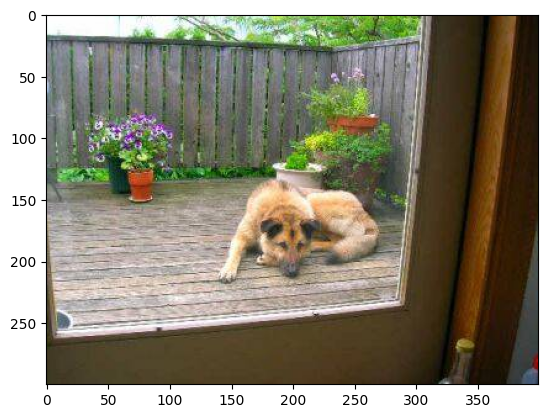

In [13]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mping

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
#In ảnh đọc được
plt.imshow(mping.imread(path))

img=image.load_img(path,target_size=(200,200))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
y_predict=model.predict(images,batch_size=3)
print(y_predict)
print('Giá trị dự đoán: ', label[np.argmax(y_predict)])
# from google.colab import files
# from keras.preprocessing import image
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.image as mping

# uploaded = files.upload()

# for fn in uploaded.keys():
#   # predicting images
#   path = '/content/' + fn
# #In ảnh đọc được
# plt.imshow(mping.imread(path))

# img=image.load_img(path,target_size=(300,300))
# x=image.img_to_array(img)
# x=np.expand_dims(x,axis=0)
# images=np.vstack([x])
# y_predict=model.predict(images,batch_size=10)
# print(y_predict)
# print('Giá trị dự đoán: ', label[np.argmax(y_predict[:3])])